In [4]:
import cosine_search
import spacy
from collections import Counter
import matplotlib.pyplot as plt 
from libvoikko import Voikko
v = Voikko("fi")
nlp = spacy.load("fi_core_news_sm") # load the model that will be used for the task

ModuleNotFoundError: No module named 'cosine_search'

In [81]:
def get_entities(documents): 
    entities = []
    for document in documents:
        doc = nlp(document) # parse the text with the loaded model
        for ent in doc.ents:
            if ent.label_ == "GPE": # append all geopolitical entities to a list
                entities.append(ent.text)
    
    lemmatized_entities = []
    for entity in entities:
        voikko_dict = v.analyze(entity)
        for word in voikko_dict:
            lemma = word.get("BASEFORM")
            if lemma:
                lemmatized_entities.append(lemma.lower())
                for ent in lemmatized_entities:
                    if ent == "suomi": # if entity is suomi, remove it from the list
                        lemmatized_entities.remove(ent)      
    entity_freq = Counter(lemmatized_entities) # count the occurrences of each stemmed entity
        
    print(entity_freq) # debug 
    return entity_freq

In [82]:
def plot_entities(entity_freq, n):
    most_common_entities = entity_freq.most_common(n) # get the most common entities with their frequencies
    entities, frequencies = zip(*most_common_entities) # unpack the list and group entities and frequencies to their own variables
    
    plt.figure() 
    plt.bar(entities, frequencies)
    plt.title('Most frequently occurring geopolitical entities in Yle news') # add a title   
    plt.xlabel('Geopolitical entities') # name the x-axis   
    plt.ylabel('Frequency') # name of the y-axis
    plt.xticks(rotation=45)
    plt.show()

Counter({'venäjä': 94, 'ukraina': 80, 'ruotsi': 58, 'yhdysvalta': 38, 'viro': 34, 'suomia': 16, 'saksa': 14, 'tampere': 11, 'helsinki': 9, 'florida': 9, 'tanska': 8, 'israel': 8, 'neuvostoliitto': 6, 'jyväskylä': 6, 'pariisi': 6, 'porvoo': 6, 'tallinna': 4, 'ranska': 4, 'tšekki': 4, 'puola': 4, 'sastamala': 4, 'berliini': 4, 'tilastokeskus': 4, 'pohjanmaa': 3, 'eu': 3, 'pori': 3, 'pora': 3, 'teknologiateollisuus': 3, 'kenia': 3, 'juuso': 3, 'intia': 2, 'japani': 2, 'sallia': 2, 'serbia': 2, 'jumala': 2, 'gallen-kallela': 2, 'pirkanmaa': 2, 'espanja': 2, 'moskova': 2, 'liiga': 2, 'portugali': 2, 'aamu': 2, 'pietari': 2, 'kokkola': 2, 'norja': 2, 'islanti': 2, 'euroviisu': 2, 'lennokki-isku': 1, 'alhoniemi': 1, 'perintöviro': 1, 'kööpenhamina': 1, 'mikkola': 1, 'detroit': 1, 'odysseus': 1, 'oulu': 1, 'instagram': 1, 'somekone': 1, 'senegal': 1, 'susijengi': 1, 'jantunen': 1, 'em-alkulohko': 1, 'espoo': 1, 'euroliiga': 1, 'britannia': 1, 'siperia': 1, 'valko-venäjä': 1, 'usa': 1, 'lukašen

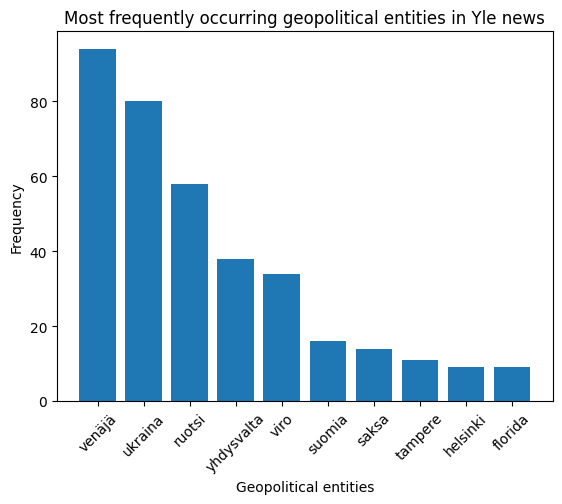

<Figure size 640x480 with 0 Axes>

In [84]:
def main():
    df_ex = cosine_search.read_data() # read the data into the df_ex variable
    documents = df_ex["text"].tolist()
    entity_freq = get_entities(documents)
    ner_plot = plot_entities(entity_freq, 10)
    plt.savefig('ner_plot.png')
    
if __name__ == "__main__":

    main()